In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.models import load_model, Model

Using TensorFlow backend.


In [2]:
item_categories = pd.read_csv('item_categories.csv')
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [3]:
item_categories['item_category_name'].count()

84

In [4]:
item_categories.isnull().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [5]:
items = pd.read_csv('items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
items.item_id.nunique()

22170

In [7]:
items.item_id.describe()

count    22170.00000
mean     11084.50000
std       6400.07207
min          0.00000
25%       5542.25000
50%      11084.50000
75%      16626.75000
max      22169.00000
Name: item_id, dtype: float64

In [8]:
items.isnull().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [9]:
x=items.groupby(['item_category_id']).count()
x=x.sort_values(by='item_id',ascending=False)
x=x.iloc[0:10].reset_index()

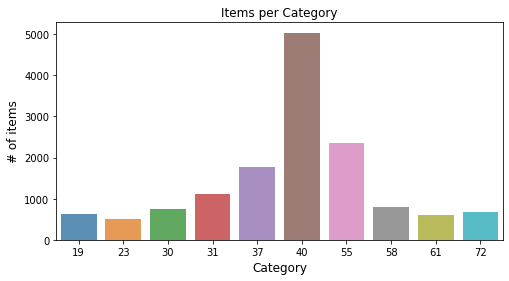

In [10]:
plt.figure(figsize=(8,4))
ax= sns.barplot(x.item_category_id, x.item_id, alpha=0.8)
plt.title("Items per Category")
plt.ylabel('# of items', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

In [11]:
shops = pd.read_csv('shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [12]:
shops.shop_id.count()

60

In [13]:
shops.isnull().sum()

shop_name    0
shop_id      0
dtype: int64

In [14]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [15]:
sample_submission.tail()

,ID,item_cnt_month
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5
214199,214199,0.5


In [16]:
test = pd.read_csv('test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [17]:
test.tail()

,ID,shop_id,item_id
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648
214199,214199,45,969


In [18]:
test.shop_id.describe()

count    214200.000000
mean         31.642857
std          17.561933
min           2.000000
25%          16.000000
50%          34.500000
75%          47.000000
max          59.000000
Name: shop_id, dtype: float64

In [19]:
test.shop_id.nunique()

42

In [20]:
test.shop_id.unique()

array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
       18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
       35, 38, 34, 46, 41, 44, 39, 45], dtype=int64)

In [21]:
sales_train = pd.read_csv('sales_train.csv')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [22]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [23]:
sales_train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [24]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [25]:
sales_train.item_id.nunique()

21807

In [26]:
sales_train.item_cnt_day.nunique()

198

In [27]:
sales_train = sales_train.query('item_price > 0')

In [28]:
# Only shops that exist in test set.
sales_train = sales_train[sales_train['shop_id'].isin(test['shop_id'].unique())]
# Only items that exist in test set.
sales_train = sales_train[sales_train['item_id'].isin(test['item_id'].unique())]

In [29]:
sales_train.shape

(1224439, 6)

In [30]:
sales_train = sales_train.query('item_cnt_day >= 0 and item_price < 75000')

In [31]:
sales_train['year'] = pd.to_datetime(sales_train['date']).dt.strftime('%Y')
sales_train['month'] = pd.to_datetime(sales_train['date']).dt.strftime('%m')
#sales['month'] = sales.date.apply(lambda x: datetime.strptime(x,'%d.%m.%Y').strftime('%m')) #another way for same thing
sales_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
0,02.01.2013,0,59,22154,999.0,1.0,2013,02
10,03.01.2013,0,25,2574,399.0,2.0,2013,03


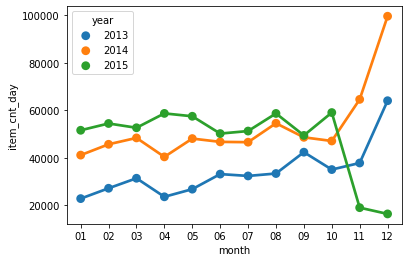

In [32]:
cleaned = pd.DataFrame(sales_train.groupby(['year','month'])['item_cnt_day'].sum().reset_index())
sns.pointplot(x='month', y='item_cnt_day', hue='year', data=cleaned)

In [33]:
monthly_sales=sales_train.groupby(["date_block_num","shop_id","item_id"])[
    "date_block_num","date","item_price","item_cnt_day"].agg({"date_block_num":'mean',"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

monthly_sales.head()

date_block_num        date              \
                                         mean         min         max   
date_block_num shop_id item_id                                          
0              2       33                   0  05.01.2013  05.01.2013   
                       482                  0  16.01.2013  16.01.2013   
                       491                  0  09.01.2013  09.01.2013   
                       839                  0  22.01.2013  22.01.2013   
                       1007                 0  11.01.2013  25.01.2013   

                               item_price item_cnt_day  
                                     mean          sum  
date_block_num shop_id item_id                          
0              2       33           499.0          1.0  
                       482         3300.0          1.0  
                       491          600.0          1.0  
                       839         3300.0          1.0  
                       1007         449.0          3.0

In [34]:
monthly_sales.tail()

date_block_num        date              \
                                         mean         min         max   
date_block_num shop_id item_id                                          
33             59      22087               33  05.10.2015  23.10.2015   
                       22088               33  03.10.2015  27.10.2015   
                       22091               33  03.10.2015  03.10.2015   
                       22100               33  18.10.2015  18.10.2015   
                       22102               33  16.10.2015  16.10.2015   

                               item_price item_cnt_day  
                                     mean          sum  
date_block_num shop_id item_id                          
33             59      22087        119.0          6.0  
                       22088        119.0          2.0  
                       22091        179.0          1.0  
                       22100        629.0          1.0  
                       22102       1250.0          1.0

In [35]:
sales_data_flat = monthly_sales.item_cnt_day.apply(list).reset_index()
#Keep only the test data of valid

sales_data_flat.head(10)

,date_block_num,shop_id,item_id,sum
0,0,2,33,1.0
1,0,2,482,1.0
2,0,2,491,1.0
3,0,2,839,1.0
4,0,2,1007,3.0
5,0,2,1010,1.0
6,0,2,1023,2.0
7,0,2,1204,1.0
8,0,2,1224,1.0
9,0,2,1247,1.0


In [36]:
sales_data_flat = pd.merge(test,sales_data_flat,on = ['item_id','shop_id'],how = 'left')
sales_data_flat.head(10)

,ID,shop_id,item_id,date_block_num,sum
0,0,5,5037,20.0,1.0
1,0,5,5037,22.0,1.0
2,0,5,5037,23.0,2.0
3,0,5,5037,24.0,2.0
4,0,5,5037,28.0,1.0
5,0,5,5037,29.0,1.0
6,0,5,5037,30.0,1.0
7,0,5,5037,31.0,3.0
8,0,5,5037,32.0,1.0
9,1,5,5320,NaN,NaN


In [37]:
sales_data_flat.fillna(0,inplace = True)
sales_data_flat.drop(['shop_id','item_id'],inplace = True, axis = 1)
sales_data_flat.head(10)

,ID,date_block_num,sum
0,0,20.0,1.0
1,0,22.0,1.0
2,0,23.0,2.0
3,0,24.0,2.0
4,0,28.0,1.0
5,0,29.0,1.0
6,0,30.0,1.0
7,0,31.0,3.0
8,0,32.0,1.0
9,1,0.0,0.0


In [38]:
sales = sales_data_flat.pivot_table(index='ID', columns='date_block_num',fill_value = 0,aggfunc='sum' )
sales.head(10)

sum                                               ...       \
date_block_num 0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0   ... 24.0   
ID                                                                ...        
0                 0    0    0    0    0    0    0    0    0    0  ...    2   
1                 0    0    0    0    0    0    0    0    0    0  ...    0   
2                 0    0    0    0    0    0    0    0    0    0  ...    0   
3                 0    0    0    0    0    0    0    0    0    0  ...    0   
4                 0    0    0    0    0    0    0    0    0    0  ...    0   
5                 0    0    0    0    0    0    0    0    0    0  ...    1   
6                 0    0    0    0    0    0    0    0    0    0  ...    0   
7                 0    0    0    0    0    0    0    0    0    0  ...    0   
8                 0    0    0    0    0    0    0    0    0    0  ...    9   
9                 0    0    0    0    0    0    0    0    0    0  ...    0   

                                                             
date_block_num 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0  
ID                                                           
0                 0    0    0    1    1    1    3    1    0  
1                 0    0    0    0    0    0    0    0    0  
2                 0    0    0    3    2    0    1    3    1  
3                 0    0    0    0    0    0    1    0    0  
4                 0    0    0    0    0    0    0    0    0  
5                 0    0    0    3    0    0    0    1    1  
6                 0    0    0    0    0    0    0    3    2  
7                 0    1    0    0    1    0    0    0    0  
8                 2    3    2    2    4    3    2    3    0  
9                 0    0    0    0    0    0    0    0    0  

[10 rows x 34 columns]

In [39]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(sales.values[:,:-1],axis = 2)
# the last column is our prediction
y_train = sales.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(sales.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [40]:
sales_model = Sequential()
sales_model.add(LSTM(units = 64,input_shape = (33,1)))
#sales_model.add(LSTM(units = 64,activation='relu'))
sales_model.add(Dropout(0.5))
sales_model.add(Dense(1))

sales_model.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
sales_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [41]:
sales_model.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
214200/214200 [==============================] - 59s 275us/step - loss: 30.5763 - mean_squared_error: 30.5763
Epoch 2/10
214200/214200 [==============================] - 58s 270us/step - loss: 30.2625 - mean_squared_error: 30.2625
Epoch 3/10
214200/214200 [==============================] - 59s 275us/step - loss: 30.0661 - mean_squared_error: 30.0661
Epoch 4/10
214200/214200 [==============================] - 58s 273us/step - loss: 29.9168 - mean_squared_error: 29.9168
Epoch 5/10
214200/214200 [==============================] - 61s 284us/step - loss: 29.7875 - mean_squared_error: 29.7875
Epoch 6/10
214200/214200 [==============================] - 69s 320us/step - loss: 29.7847 - mean_squared_error: 29.7847
Epoch 7/10
214200/214200 [==============================] - 62s 288us/step - loss: 29.6875 - mean_squared_error: 29.6875
Epoch 8/10
214200/214200 [==============================] - 70s 325us/step - loss: 29.6886 - mean_squared_error: 29.6886
Epoch 9/10
214200/214200 [======

In [42]:
submission_output = sales_model.predict(X_test)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test['ID'],'item_cnt_month':submission_output.ravel()})
submission.head()

,ID,item_cnt_month
0,0,0.439107
1,1,0.131761
2,2,0.779750
3,3,0.176065
4,4,0.131761


In [43]:
# creating csv file from dataframe
submission.to_csv('submission.csv',index = False)

# FB Prophet

In [44]:
ts=sales_train.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
ts=ts.reset_index()
ts.head()

,index,item_cnt_day
0,2013-01-01,20671.0
1,2013-02-01,22227.0
2,2013-03-01,31632.0
3,2013-04-01,20746.0
4,2013-05-01,23350.0


In [45]:
from fbprophet import Prophet
#prophet reqiures a pandas df at the below config 
# ( date column named as DS and the value column as Y)
ts.columns=['ds','y']
model = Prophet( yearly_seasonality=True) #instantiate Prophet with only yearly seasonality as our data is monthly 
model.fit(ts)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 5, freq = 'MS')  
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
34,2015-11-01,73730.374691,69600.427015,77782.457643
35,2015-12-01,111343.455194,107204.510725,115389.381776
36,2016-01-01,73961.627856,70261.848549,77481.984080
37,2016-02-01,56417.771363,52307.068405,60728.406473
38,2016-03-01,80858.254230,76874.298018,85000.632775


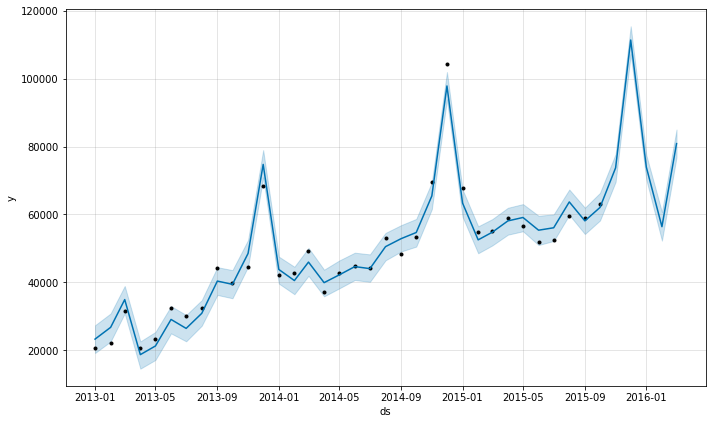

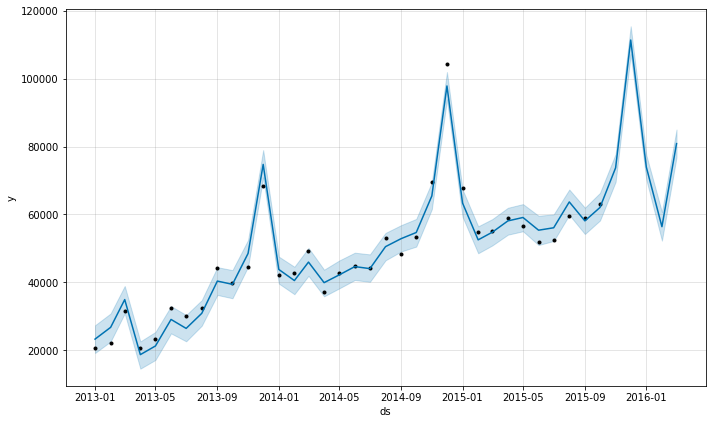

In [47]:
model.plot(forecast)

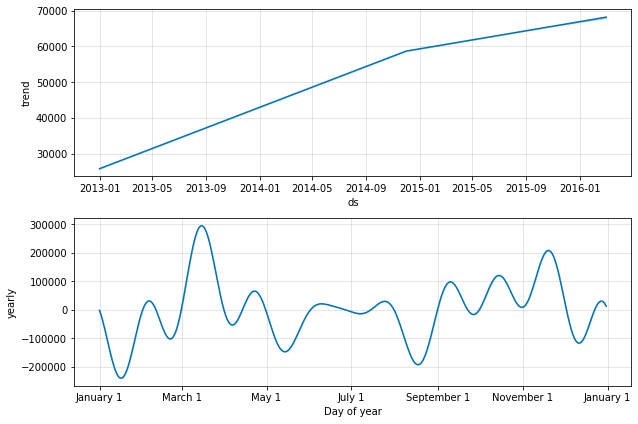

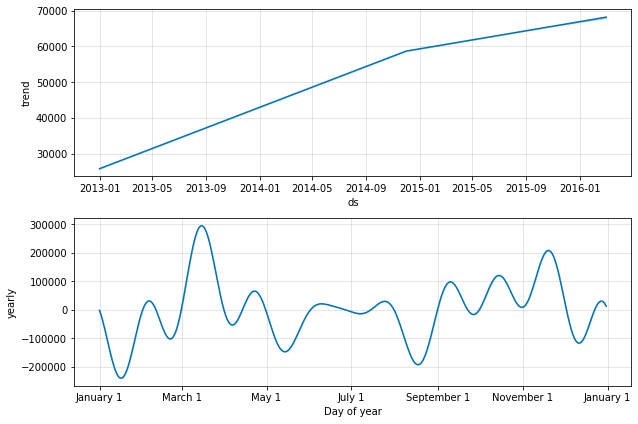

In [48]:
model.plot_components(forecast)